In [1]:
import os
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from sklearn import svm
import PIL
import pickle
import cv2

In [7]:
data_dir = '../data/combined/'
train_dataset = path.join(data_dir, 'train.csv')
valid_dataset = path.join(data_dir, 'valid.csv')
test_dataset = path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_dataset)
valid_df = pd.read_csv(valid_dataset)
test_df = pd.read_csv(test_dataset)

In [15]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, :1]
y = np.array(y['0'].tolist())

X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, :1]

X_valid = valid_df.iloc[:, 1:]
y_valid = valid_df.iloc[:, :1]

In [16]:
print('Train -', X.shape)
print('Valid -', X_valid.shape)
print('Test -', X_test.shape)

Train - (19670, 1024)
Valid - (7533, 1024)
Test - (8186, 1024)


In [21]:
clf = svm.SVC(kernel='rbf', gamma=0.01, C=0.7, max_iter=75, verbose=False)
clf.fit(X, y)
print(clf.score(X,y))

y_preds = clf.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=75).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9695475343162175


In [22]:
y_test_list = y_test['0'].tolist()
y_preds_list = list(y_preds)

pred_acc_list = []
for pred_class, true_class in zip(y_preds_list, y_test_list):
    pred_acc_list.append(int(pred_class==true_class))

accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
print(f'Accuracy: {round(accuracy, 2)}%')

Accuracy: 64.74%


[27]


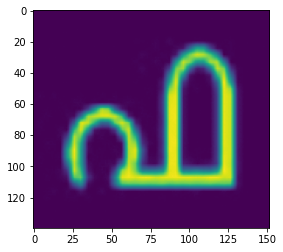

In [58]:
def resize_image(img):
    gray_img = img[:,:,2]
    gray_img = cv2.bitwise_not(gray_img)
    plt.imshow(gray_img)
    bin_img = gray_img / 25
    bin_img = cv2.resize(bin_img, (32, 32))
    img_32X32 = bin_img > 0
    img_32X32 = img_32X32.astype(int)
    img_1X1024 = np.reshape(img_32X32, (1, 1024)) 
    return img_1X1024

image_cv2 = cv2.imread('t.png', cv2.IMREAD_UNCHANGED)
img_pix = resize_image(image_cv2)

result = clf.predict(img_pix)
print(result)